Planning and Evaluation of Experiments
===============

### Filip Münz
#### Inst. of Condensed Matter Physics, Fac. of Science & CEITEC
#### Masaryk University

## Brno 03/04/2019

In [2]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np

<footer id="attribution" style="float:right; color:#999; background:#fff;">Sitola seminar 2019</footer>
<style>
//change background settings {}
div.slide-background {
	border-top: 20px #aaa solid;
	border-bottom: 20px #aaa solid;
}
//div.slide-background:after {text:"Sitola seminar 2019";}
blockquote { font-color:blue; }
img.aright {float: right; margin: 1px;}
</style>

## Variance decomposition

- in ANOVA we study impact of different factors (parameters, treatments and their interactions) on experimental outcome
- main effects = single-factor means; we marginalize out all other dependencies

from measurement ($Y$, $V(Y)=\sigma^2$) we estimate a model $\hat{r}$ that differs from the *true* model $r$

$$V(Y-\hat{r}) = \sigma^2 +  E((\hat{r}-r)^2)= \sigma^2 +  (E(\hat{r})-r)^2 + V(\hat{r})$$

<span class="fragment">= noise</span><span class="fragment"> + bias</span><span class="fragment"> + variance (model parameter uncertainty)</span>



## Bias - variance tradeoff


- increasing model complexity to remove systematic residuals (reducing bias)
- uncertainties of parameters rise fast due to **correlations**

$\hat{r}(x)=f(x ;a_1, a_2, ... a_k)$ with covariance matrix of parameters $a_j$ equal to $W$
and first-order derivatives $$D_j=\frac{\partial f(x)}{\partial a_j}$$

final model variance
$$V(\hat{r}(x)) = D^T W D$$

## Design of experiments

full and partial "designs" : **(fractional) factorials**

usually many factors in question: we study their influence on the result and *interactions*

- categorical factors (present/not present) lead to $2^n$ designs
- quantitative factors require at least 3-level factorial ($3^n$)

see more for example from *Penn State* (Eberly College)
https://newonlinecourses.science.psu.edu/stat503/

#### curse of dimensionality

reducing number of needed experiments  (sometimes to allow more replications)

higher order interactions are *confounded* with main (basic) effects

<img style="float:left; width:270pt;" name="design" src="http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/designs_mintab.gif"/>
<img style="float:right; width:250pt;" name="5factors" src="http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/factor5.gif"/>


<img style="float:left; width: 270pt;" name="7factors" src="http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/factor7.gif"/>
<img style="float:right; width: 270pt;" name="8factors" src="http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/factor8.gif"/>


In [9]:
mome=list("ABCDEF")
genes=[list("ABCD"),list("CDEF")]
g=set(genes[1])
i=2
proc=lambda g,h:"".join(list(g.difference(g.intersection(set(h)))))
[proc(g,m) for m in mome]

['EDFC', 'EDFC', 'EDF', 'EFC', 'DFC', 'EDC']

In [31]:
qplan=np.array([[(i>>(j))%2>0 for j in range(3)] for i in range(8)])
pA,pB,pC=qplan.T
fplan=np.array([pA,pB,pC,pA*pB*pC]).T#np.array(list(qplan.T)+[qplan[:,0]*qplan[:,1],qplan[:,2]*qplan[:,1]]).T
zome=np.array(mome[:4])
["".join(zome[q]) for q in fplan]

['', 'A', 'B', 'AB', 'C', 'AC', 'BC', 'ABCD']

Example
=============
### mapping reflectivity on grown oxide

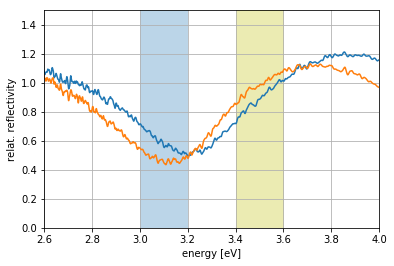

In [147]:
pl.plot(bix,dd[2:,10])
pl.plot(bix,dd[2:,60])
pl.xlim(2.6,4)
pl.xlabel("energy [eV]")
pl.ylabel("relat. reflectivity")
pl.axvspan(3.0,3.2,alpha=0.3)
pl.axvspan(3.4,3.6,alpha=0.3,color='y')
pl.grid()
pl.ylim(0,1.5);
pl.savefig("waf_spec_example.png")

- not attempting to model spectral response - only **average reflectivity** of a selected narrow band (virtual filter)

In [ ]:
#bix=sm.bands[10].ix
px1,py1=dd[0,1:],dd[1,1:]
bix=dd[2:,0]
zsel1=abs(bix-3.5)<0.1
#vs1=np.array([b.iy[zsel1].mean() for b in sm.bands])
vs1=dd[2:,1:][zsel1].mean(0)
zsel2=abs(bix-3.1)<0.1
#vs2=np.array([b.iy[zsel2].mean() for b in sm.bands])
vs2=dd[2:,1:][zsel2].mean(0)
chsel=(vs1>0.8)*(vs1<1)
px1=px1[chsel]
py1=py1[chsel]
vs2=vs2[chsel]
vs1=vs1[chsel]

we select upper band (stronger signal)

(0.8702095161290325, 0.986567741935484)

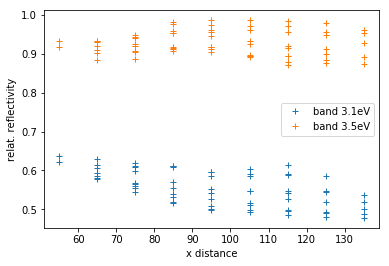

In [122]:
pl.plot(px1,vs2,'+',label="band 3.1eV")
pl.plot(px1,vs1,'+',label="band 3.5eV")
pl.xlabel("x distance")
pl.ylabel("relat. reflectivity")
pl.legend()
#pl.ylim(0.8,1)
pl.savefig("waf_orig_disp.png")
vs.min(),vs.max()

y-dependence seems to follow a sinusoidal wave

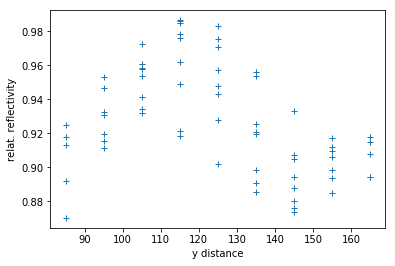

In [128]:
pl.plot(py1,vs,'+')
pl.ylabel("relat. reflectivity")
pl.xlabel("y distance")
pl.savefig("waf_disp_y.png");
#pl.ylim(0.8,1)

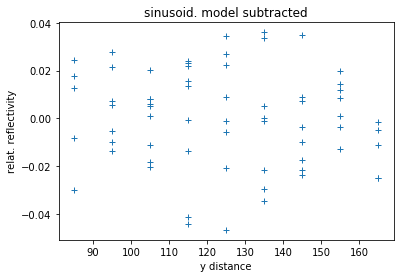

In [125]:
frac=lambda q:q-int(q)
def gdif(yper=70,rep=0):
    mat=np.array([np.cos(2*np.pi*py1/yper),np.sin(2*np.pi*py1/yper),np.ones_like(py1)]).T
    hess=mat.T.dot(mat)
    pars=np.linalg.inv(hess).dot(mat.T).dot(vs)
    if rep==1: return pars
    if rep==2: return mat.dot(pars) 
    return vs-mat.dot(pars)
pl.plot(py1,gdif(72),'+')
pl.ylabel("relat. reflectivity")
pl.xlabel("y distance")
pl.title("sinusoid. model subtracted")
pl.savefig("waf_disp_y_sub72.png");

testing a range of periods 
- linear model in amplitude + phase + offset ($p_0 + p_1\ \cos y/d + p_2\ \sin y/d$)
- non-linear optimization in 1 variable only

Optimization terminated successfully.
         Current function value: 0.025927
         Iterations: 17
         Function evaluations: 34


(76.47462844848633, array([-0.03406639,  0.00326054,  0.92772349]))

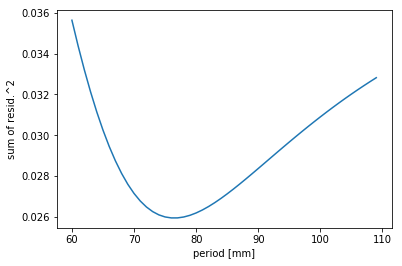

In [129]:
lper=np.r_[60:110]
pl.plot(lper,[(gdif(l)**2).sum() for l in lper])
from scipy import optimize as op
pst=op.fmin(lambda p:(gdif(p)**2).sum(),[75])[0]
pl.ylabel("sum of resid.^2")
pl.xlabel("period [mm]")
pl.savefig("waf_period_min.png");

pst,gdif(pst,1)

subtracting model for y-axis variance was reduced to 40%

<span class="fragment">- now back to x-dependence</span>

reducing by subtracting y depend.


(0.007471202204601405, 0.002100297665866671)

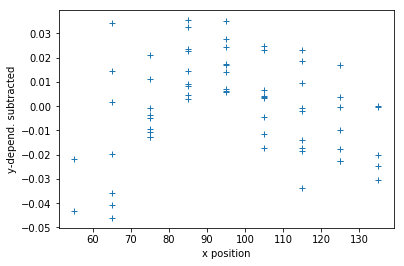

In [135]:
psuby=gdif(pst)
pl.plot(px1,psuby,'+')
pl.xlabel("x position")
pl.ylabel("y-depend. subtracted");
pl.savefig("waf_disp_x.png");
from scipy import ndimage as nd
ovar=nd.variance(vs,px1,np.unique(px1))
nvar=nd.variance(psuby,px1,np.unique(px1))
print("reducing by subtracting y depend.")
ovar.sum(),nvar.sum()

another reduction by 35% by subtracting 3-rd order polynomial

(0.025926823297654843, 0.016758650194376487, 0.002100297665866671)

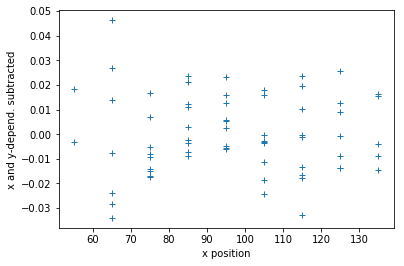

In [137]:
xfit=np.polyfit(px1,psuby,3)
xlin,ylin=np.polyval(xfit,px1),gdif(pst,2)
pres=psuby-xlin
pl.plot(px1,pres,'+')
pl.xlabel("x position")
pl.ylabel("x and y-depend. subtracted");
pl.savefig("waf_disp_both.png");
sum(psuby**2),sum(pres**2),nd.variance(psuby,px1,np.unique(px1)).sum()

we are left with "interaction" residuals

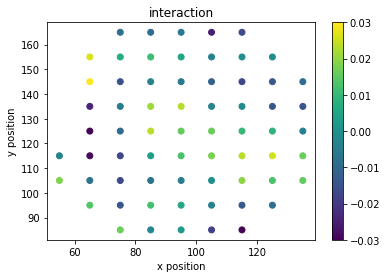

In [138]:
pl.scatter(px1,py1,c=pres,vmin=-0.03,vmax=0.03)
pl.xlabel("x position")
pl.ylabel("y position")
pl.title("interaction")
pl.colorbar();
pl.savefig("waf_resid_2d.png")

after applying cubic polynomial in $x \cdot y$ variable, dispersion only changes by 12% (with 5% reduction of d.o.f.)
- 90%  quantile of F distribution requires 38% $\to$ rejected

(1.1264033820574824, 1.0491803278688525)

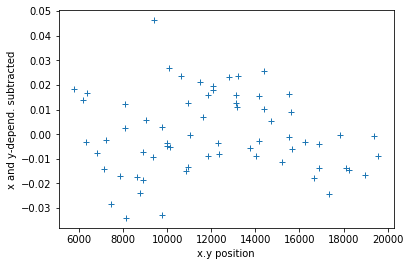

In [139]:
pl.plot(px1*py1,pres,'+')
pint12=np.polyfit(px1*py1,pres,3)
pres2=pres-np.polyval(pint12,px1*py1)
pl.xlabel("x.y position")
pl.ylabel("x and y-depend. subtracted");
pl.savefig("waf_disp_inter.png");
pres.var()/pres2.var(),(len(px1)-2)/(len(px1)-5)



## Bias - variance tradeoff


- increasing model complexity to remove systematic residuals (reducing bias)
- uncertainties of parameters rise fast due to **correlations**

$\hat{r}(x)=f(x ;a_1, a_2, ... a_k)$ with covariance matrix of parameters $a_j$ equal to $W$
and first-order derivatives $$D_j=\frac{\partial f(x)}{\partial a_j}$$

final model variance
$$V(\hat{r}(x)) = D^T W D$$

**How complicated models we want?**

Example 2
==========
### synthetic

## Simple 4th order polynomial

we try to model data with set of polynomes of type $\sum_{i=0}^n a_i x^i$ with increasing degree $n$

true values correspond to 4-th order polynomial (quadratic term dominates)

('true parameters', [0.5, 0.2, 7, -0.5, 0])

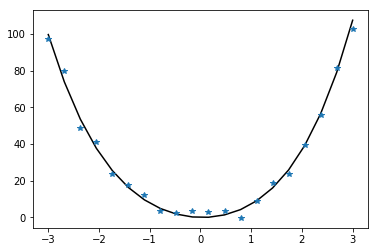

In [72]:
x=np.r_[-3:3:20j]
sigy=3.
tres=[0.5,0.2,7,-0.5,0] #skutecne parametry
ytrue=np.polyval(tres,x)
y=ytrue+np.random.normal(0,sigy,size=x.shape)
pl.plot(x,ytrue,'k',x,y,'*')
"true parameters",tres

### Statistical significance of parameters

**t-values** for *null-hypothesis* of individual parameters (polynomial coefficients)



In [73]:
ords=np.arange(1,9)
res=[np.polyfit(x,y,i,cov=True) for i in ords]
errs=[[round(p,5) for p in np.sqrt(r[1].diagonal()[::-1])/sigy] for r in res]
text=["   ".join(["%6.3f"%p for p in abs(res[i][0][::-1]/np.array(errs[i]))]) for i in range(len(res))]
for i in range(1,len(text)):
    print("order %i:"%i,text[i-1])

order 1: 12.201    0.285
order 2:  5.325    2.007   83.595
order 3:  5.234    1.146   82.158    2.100
order 4:  1.708    1.762   22.488    3.228   13.437
order 5:  1.661    2.328   21.877    2.286   13.071    1.650
order 6:  3.560    2.404    6.133    2.360    6.280    1.703    4.011
order 7:  3.399    1.902    5.857    1.280    5.997    0.759    3.829    0.532


significant values at higher order coefficients

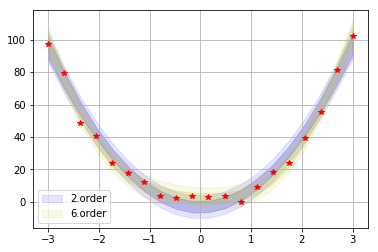

In [74]:
pder=np.array([x**i  for  i in np.r_[8:-1:-1]]).T
zcol='by'
nsig=2
j=0
pl.plot(x,y,'r*')
for k in [1,5]:
    ares=res[k]
    vmod=((pder[:,-len(ares[0]):].dot(ares[1]))*pder[:,-len(ares[0]):]).sum(1)
    ymod=np.polyval(ares[0],x)
    pl.fill_between(x,ymod-nsig*np.sqrt(vmod),ymod+nsig*np.sqrt(vmod),color=zcol[j],alpha=0.2)
    pl.fill_between(x,ymod-nsig*np.sqrt(vmod+sigy**2),ymod+nsig*np.sqrt(vmod+sigy**2),color=zcol[j],alpha=0.1,label="%i.order"%(k+1))
    j+=1
pl.legend()
pl.grid()

double error band: model variability combines with (simulated) uncertainty of the measurement ($\sigma^2$)

- 1-sigma band should contain 68% of data points - OK

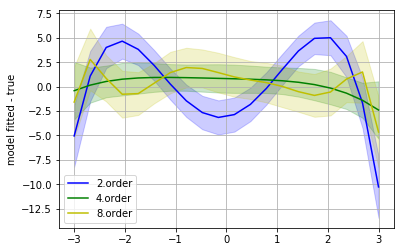

In [75]:
zcol='bgy'
j=0
for k in [1,3,7]:
    
    ares=res[k]
    ymod=np.polyval(ares[0],x)-ytrue
    pl.plot(x,ymod,color=zcol[j],label="%i.order"%(k+1))
    vmod=((pder[:,-len(ares[0]):].dot(ares[1]))*pder[:,-len(ares[0]):]).sum(1)
    pl.fill_between(x,ymod-np.sqrt(vmod),ymod+np.sqrt(vmod),color=zcol[j],alpha=0.2)
    j+=1
pl.ylabel("model fitted - true")
pl.legend()
pl.grid()

higher order polynomials should come closer to "true" functions
<p class="fragment">- but we fit on "noise" instead</p>

In [76]:
smanu=[]
for i in range(1000):
    y=ytrue+np.random.normal(0,sigy,size=x.shape)
    resm=[np.polyfit(x,y,i,cov=False) for i in ords]
    smanu.append([((y-np.polyval(r,x))**2).sum() for r in resm] )
smanu=np.array(smanu)
#s0=[s.mean() for s in smanu]
siges=np.sqrt(smanu.mean(0)/(20-1-ords))

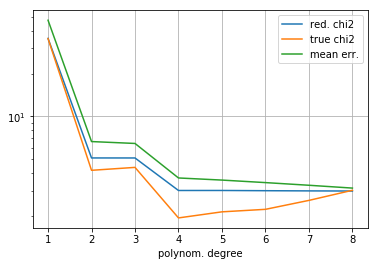

In [90]:
strue=[((ytrue-np.polyval(r,x))**2).sum() for r in resm]
#sigcom=sqrt(array(s0)/(20-1-ords)) # redukovany chi2
pl.semilogy(ords,siges)
pl.semilogy(ords,np.sqrt(np.array(strue)/(20-1-ords)))
pl.semilogy(ords,np.sqrt(smanu.mean(0)/10))
pl.legend(['red. chi2','true chi2','mean err.'])
pl.xlabel("polynom. degree")
pl.grid()

- in practice we cannot compare estimated model to "true" function

In [79]:
#[[round(p,3) for p in r[0][::-1]] for r in res]
text=["   ".join(["%6.3f"%p for p in r[0][::-1]]) for r in res]
for i in range(1,len(text)+1):
    print("order %i:"%i,text[i-1])

order 1: 33.342    0.428
order 2: -3.110    0.428   10.994
order 3: -3.110   -0.628   10.994    0.178
order 4:  0.829   -0.628    6.986    0.178    0.474
order 5:  0.829   -1.514    6.986    0.601    0.474   -0.039
order 6:  2.019   -1.514    4.395    0.601    1.277   -0.039   -0.061
order 7:  2.019   -1.922    4.395    0.986    1.277   -0.127   -0.061    0.006
order 8:  1.207   -1.922    7.511    0.986   -0.543   -0.127    0.273    0.006   -0.019


In [80]:
def test_poly(x,ytrue,sigy,ords=np.r_[1:10],rep=1):
    '''podle rep:
    1: rozdil skutecne funkce a modelu
    2: rozdil nove sady dat a modelu
    '''
    y=ytrue+np.random.normal(0,sigy,size=x.shape)
    res=[np.polyfit(x,y,i,cov=True) for i in ords]
    if rep==1:
        scom=[((ytrue-np.polyval(r[0],x))**2).sum() for r in res]
        return np.array(scom)/(len(x)-1-ords)
    if rep==2: # validation
        ycom=ytrue+np.random.normal(0,sigy,size=x.shape)
        scom=[((ycom-np.polyval(r[0],x))**2).sum() for r in res]
        return np.array(scom)/(len(x)-1-ords)
    return res

*validation* = applying model to another set of data

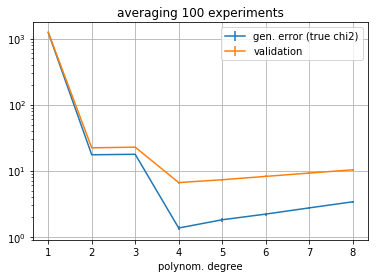

In [85]:
fullmat=np.array([test_poly(x,ytrue,2,ords=ords,rep=1) for k in range(100)])
fullmat2=np.array([test_poly(x,ytrue,2,ords=ords,rep=2) for k in range(100)])
imin=0
pl.errorbar(ords[imin:],fullmat.mean(0)[imin:],fullmat.std(0)[imin:]/10.)
pl.errorbar(ords[imin:],fullmat2.mean(0)[imin:],fullmat2.std(0)[imin:]/10.)
pl.yscale("log")
pl.xlabel("polynom. degree")
pl.legend(["gen. error (true chi2)","validation"])
pl.title("averaging 100 experiments")
pl.grid();

## Principal component analysis

- "ultimate correlation tool" (C.R.Jenkins) - transforming into space of orthogonal directions

- first component $a_1 X$ to maximize variance in chosen direction $a_1$
- next component $a_2$ is searched for in orthogonal sub-space, again maximizing remaining variance

![2variables](http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/pca_2var.png)

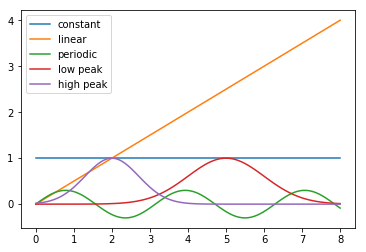

In [3]:
x=np.r_[0:8:100j]
fun=[np.ones_like(x),0.5*x]#0.05*x**2]
fun.append(0.3*np.sin(x*2.))
fun.append(np.exp(-(x-5)**2/2.))
fun.append(np.exp(-(x-2)**2))
nmeas=20
[pl.plot(x,f) for f in fun]
pl.legend(["constant","linear","periodic","low peak","high peak"])
allpars=np.array([np.random.normal(a,0.4*abs(a),size=nmeas) for a in [3,-1,1.5,2,3.1]]) #sada ruznych koefientu jednotlivych komponent

we generate synthetic spectra by mixing 5 (non-orthogonal) functions

can be used to work in space of (physically) different variables, they should be normalized $X \to (X-E(X))/\sqrt{V(X)}$
- now the correlation is a simple scalar product

        renfunc=testfunc-testfunc.mean(1)[:,np.newaxis]
        renfunc/=np.sqrt((renfunc**2).sum(1))[:,np.newaxis]
        cormat=renfunc.dot(renfunc.T)
        eig,vecs=np.linalg.eig(cormat)


in spectral analysis we look for common patterns in data (here 100 points)
- typical case: identify different materials in 2-D map

- we have 20 sets of parameters, generate combination of 5 basic functions and add some gaussian noise  

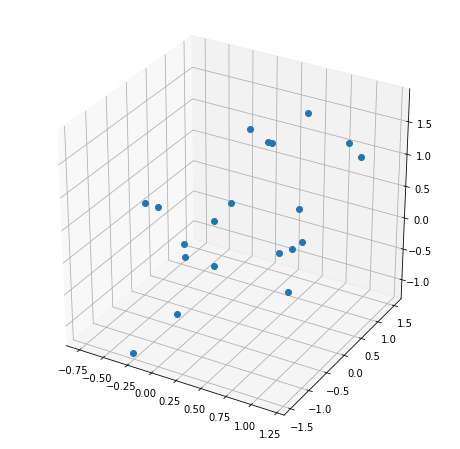

In [1]:
import numpy as np
nset=10
setsiz=20
nconf=4
samp1=np.random.multivariate_normal(np.zeros(nset),np.eye(nset)*0.2,setsiz).T
weits=np.random.uniform(0,1,(nconf,nset)).reshape(nconf,nset,1)
x=np.r_[:setsiz].reshape(1,setsiz)
samp1+=weits[0]*np.sin(x*0.4+0.2)
samp1+=weits[1]*np.sin(x*0.7-0.2)
samp1+=weits[2]*np.sin(x*0.1+1.7)
samp1+=weits[3]*(x/10.-1)*.7
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
out=ax.plot(samp1[0,:], samp1[1,:], samp1[2,:],'o');


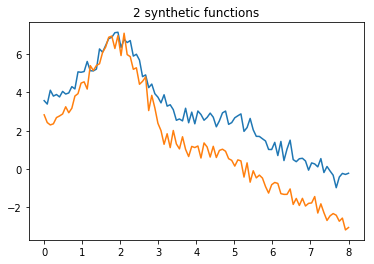

In [4]:
testfunc=allpars.T.dot(fun)
for i in range(len(testfunc)):
    testfunc[i]+=np.random.normal(0,0.3,size=len(x))
pl.plot(x,testfunc[3])
pl.title("2 synthetic functions")
pl.plot(x,testfunc[1]);

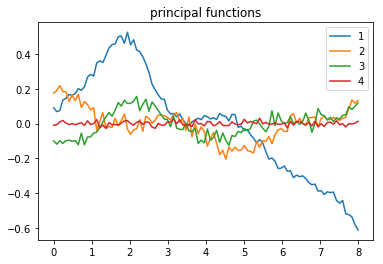

In [8]:
renfunc=testfunc-testfunc.mean(1)[:,np.newaxis] #renormalization
renfunc/=np.sqrt((renfunc**2).sum(1))[:,np.newaxis]
cormat10=renfunc[:10].dot(renfunc[:10].T)
eig10,vecs10=np.linalg.eig(cormat10)
prinfunc=vecs10.T.dot(renfunc[:10])
[pl.plot(x,p) for p in prinfunc[:4]];
pl.title("principal functions")
pl.legend(range(1,5));

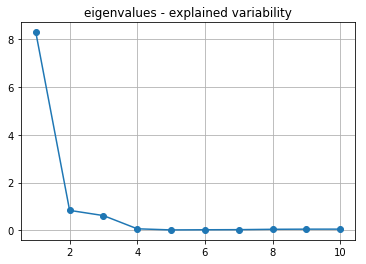

In [32]:
pl.plot(range(1,11),eig10,"o-")
pl.title("eigenvalues - explained variability")
pl.grid()

only 3 function effectively needed

### Lessons learned

- most analysis tasks can be seen as *explaning variability* of experimental dataset

- reasoning for extra model parameters can be best proven by *validation*

- principal component analysis cannot separate correlated functions<p class="fragment">- but helps to reduce the information</p>

*... thank for your kind attention*